In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sportsipy.ncaab import boxscore
from sportsipy.ncaab.teams import Teams
from sportsipy.ncaab.teams import Team

df1 = pd.read_csv('./2018-2019_pregamestatsfinal.csv')
df2 = pd.read_csv('./2019-2020_pregamestatsfinal.csv')

In [14]:
df = pd.concat([df1, df2])

In [15]:
df.drop(columns=['conf', 'location', 'homeindex'], inplace=True)

In [16]:
# We have a population of just 2 seasons. It's dangerous to just take the back .15 of the games, they should be time-insensitive
# We need to create a holdout sample to test with
test_df = df.sample(frac = 0.15)

train_df = pd.concat([test_df,df]).drop_duplicates(keep=False)

print(len(df), ' ', len(test_df), ' ', len(train_df))


train_df.head()

from sklearn import datasets, linear_model
from sklearn.model_selection  import train_test_split



10789   1618   9171


In [17]:
# Dropping irrelevant columns
train_df.drop(columns=['home_team_name', 'away_team_name', 'team_name', 'winning_abbr', 'winning_name', 'losing_name', 'losing_abbr', 'home_team', 'away_team'], inplace=True)
test_df.drop(columns=['home_team_name', 'away_team_name', 'team_name', 'winning_abbr', 'winning_name', 'losing_name', 'losing_abbr', 'home_team', 'away_team'], inplace=True)

test_df.head()

,boxscore,date,winner,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage
664,2018-11-10-15-la-salle,"November 10, 2018",Away,0.419355,0.356164,0.429825,0.000000,0.530303,0.453333,0.535211,0.000000
3003,2019-02-09-20-murray-state,"February 9, 2019",Home,0.465446,0.489320,0.559864,0.347826,0.556391,0.534106,0.463707,0.818182
1339,2018-11-18-15-south-dakota,"November 18, 2018",Away,0.551829,0.532934,0.490323,0.666667,0.535294,0.559585,0.494186,0.333333
1234,2020-02-19-21-houston,"February 19, 2020",Home,0.497426,0.501880,0.462597,0.680000,0.491597,0.587889,0.441572,0.769231
1546,2019-01-31-19-mercer,"January 31, 2019",Away,0.534159,0.483721,0.513923,0.380952,0.570997,0.570648,0.500884,0.809524


In [18]:
test_df.isnull().sum()

boxscore                             0
date                                 0
winner                               0
away_pregame_eFG                    76
away_pregame_rebound_percentage     76
away_pregame_eFG_allowed            76
away_pregame_win_percentage         76
home_pregame_eFG                   100
home_pregame_rebound_percentage    100
home_pregame_eFG_allowed           100
home_pregame_win_percentage        100
dtype: int64

<AxesSubplot:xlabel='winner', ylabel='count'>

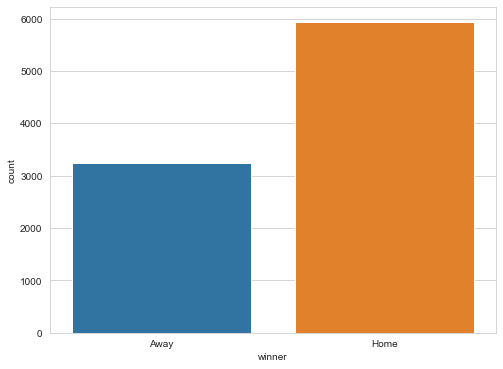

In [19]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(x='winner', data= train_df)

In [20]:
#train_df['away_pregame_eFG'].plot(kind='box', figsize= (10,8))

# Create bool masks where home team won - we will use this to get 1 and 0 for the results
winnermask1 = (test_df['winner'] == 'Home')
winnermask2 = (train_df['winner'] == 'Home')


In [21]:
# Setting a new column equal to the bool mask of winner = Home
train_df['Home_Win'] = (train_df['winner'] == 'Home')
test_df['Home_Win'] = (test_df['winner'] == 'Home')

In [22]:
test_df.head()

,boxscore,date,winner,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win
664,2018-11-10-15-la-salle,"November 10, 2018",Away,0.419355,0.356164,0.429825,0.000000,0.530303,0.453333,0.535211,0.000000,False
3003,2019-02-09-20-murray-state,"February 9, 2019",Home,0.465446,0.489320,0.559864,0.347826,0.556391,0.534106,0.463707,0.818182,True
1339,2018-11-18-15-south-dakota,"November 18, 2018",Away,0.551829,0.532934,0.490323,0.666667,0.535294,0.559585,0.494186,0.333333,False
1234,2020-02-19-21-houston,"February 19, 2020",Home,0.497426,0.501880,0.462597,0.680000,0.491597,0.587889,0.441572,0.769231,True
1546,2019-01-31-19-mercer,"January 31, 2019",Away,0.534159,0.483721,0.513923,0.380952,0.570997,0.570648,0.500884,0.809524,False


In [23]:

#Turning the True/False into 1/0
train_df["Home_Win"] = train_df["Home_Win"].astype(int)
test_df["Home_Win"] = test_df["Home_Win"].astype(int)



In [24]:
test_df.head()

,boxscore,date,winner,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win
664,2018-11-10-15-la-salle,"November 10, 2018",Away,0.419355,0.356164,0.429825,0.000000,0.530303,0.453333,0.535211,0.000000,0
3003,2019-02-09-20-murray-state,"February 9, 2019",Home,0.465446,0.489320,0.559864,0.347826,0.556391,0.534106,0.463707,0.818182,1
1339,2018-11-18-15-south-dakota,"November 18, 2018",Away,0.551829,0.532934,0.490323,0.666667,0.535294,0.559585,0.494186,0.333333,0
1234,2020-02-19-21-houston,"February 19, 2020",Home,0.497426,0.501880,0.462597,0.680000,0.491597,0.587889,0.441572,0.769231,1
1546,2019-01-31-19-mercer,"January 31, 2019",Away,0.534159,0.483721,0.513923,0.380952,0.570997,0.570648,0.500884,0.809524,0


In [25]:
# Creating a column that has the month the game took place in. Not sure whether this is 100% a good idea
train_df.reset_index(inplace=True)

for i in range(0,10000):
    datestring = train_df.at[i, 'date']
    if 'Novemb' in datestring:
        train_df.at[i, 'month'] = 'November'
    elif 'Dece' in datestring:
        train_df.at[i, 'month'] = 'December'
    elif 'Janu' in datestring:
        train_df.at[i, 'month'] = 'January'
    elif 'Febr' in datestring:
        train_df.at[i, 'month'] = 'February'
    elif 'Mar' in datestring:
        train_df.at[i, 'month'] = 'March'
    elif 'Apr' in datestring:
        train_df.at[i, 'month'] = 'April'
    else:
        print('error')

KeyError: 9171

In [26]:
# Do the same for the testing data
test_df.reset_index(inplace=True)

for i in range(0,5000):
    datestring = test_df.at[i, 'date']
    if 'Novemb' in datestring:
        test_df.at[i, 'month'] = 'November'
    elif 'Dece' in datestring:
        test_df.at[i, 'month'] = 'December'
    elif 'Janu' in datestring:
        test_df.at[i, 'month'] = 'January'
    elif 'Febr' in datestring:
        test_df.at[i, 'month'] = 'February'
    elif 'Mar' in datestring:
        test_df.at[i, 'month'] = 'March'
    elif 'Apr' in datestring:
        test_df.at[i, 'month'] = 'April'
    else:
        print('error')


KeyError: 1618

In [27]:
train_df["date"] = train_df["date"].astype("datetime64")
test_df["date"] = test_df["date"].astype("datetime64")


<AxesSubplot:xlabel='date'>

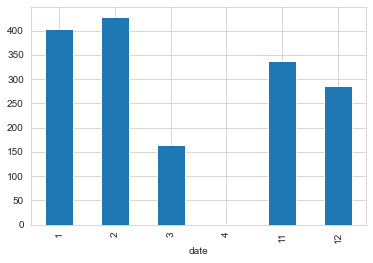

In [28]:
testdates = test_df['date']
testdates.groupby(testdates.dt.month).count().plot(kind='bar')

<AxesSubplot:xlabel='date'>

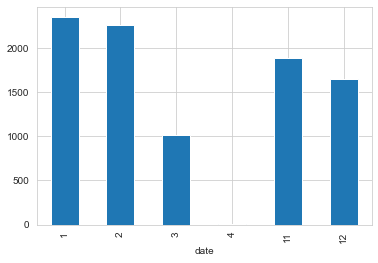

In [29]:
traindates = train_df['date']
traindates.groupby(traindates.dt.month).count().plot(kind='bar')

In [30]:
# TODO: Drop the April games
train_df = train_df[train_df['month'] != 'April']
test_df = test_df[test_df['month'] != 'April']

<AxesSubplot:xlabel='date'>

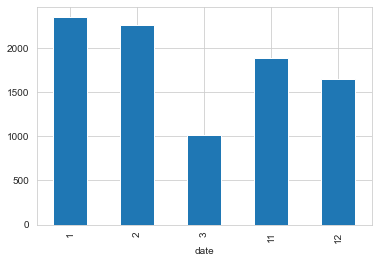

In [31]:
# Confirm that we are down to 5 months and the distributions are similar
traindates = train_df['date']
traindates.groupby(traindates.dt.month).count().plot(kind='bar')

<AxesSubplot:xlabel='date'>

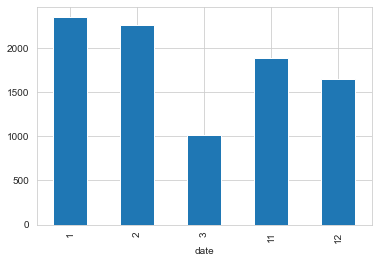

In [32]:
traindates = train_df['date']
traindates.groupby(traindates.dt.month).count().plot(kind='bar')

<AxesSubplot:xlabel='date'>

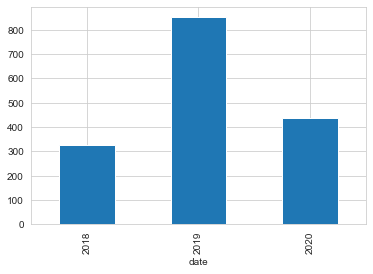

In [33]:
# Checking that test and train dfs have similar distributions by game
testdates = test_df['date']
testdates.groupby(testdates.dt.year).count().plot(kind='bar')

<AxesSubplot:xlabel='date'>

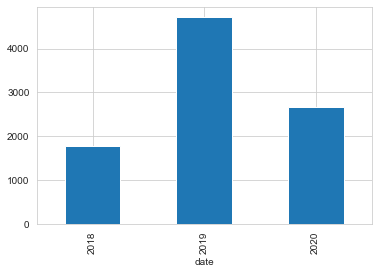

In [34]:
traindates = train_df['date']
traindates.groupby(traindates.dt.year).count().plot(kind='bar')

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 0 to 1617
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            1617 non-null   int64         
 1   boxscore                         1617 non-null   object        
 2   date                             1617 non-null   datetime64[ns]
 3   winner                           1617 non-null   object        
 4   away_pregame_eFG                 1541 non-null   float64       
 5   away_pregame_rebound_percentage  1541 non-null   float64       
 6   away_pregame_eFG_allowed         1541 non-null   float64       
 7   away_pregame_win_percentage      1541 non-null   float64       
 8   home_pregame_eFG                 1517 non-null   float64       
 9   home_pregame_rebound_percentage  1517 non-null   float64       
 10  home_pregame_eFG_allowed         1517 non-null   float64    

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9160 entries, 0 to 9170
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            9160 non-null   int64         
 1   boxscore                         9160 non-null   object        
 2   date                             9160 non-null   datetime64[ns]
 3   winner                           9160 non-null   object        
 4   away_pregame_eFG                 8745 non-null   float64       
 5   away_pregame_rebound_percentage  8745 non-null   float64       
 6   away_pregame_eFG_allowed         8745 non-null   float64       
 7   away_pregame_win_percentage      8745 non-null   float64       
 8   home_pregame_eFG                 8611 non-null   float64       
 9   home_pregame_rebound_percentage  8611 non-null   float64       
 10  home_pregame_eFG_allowed         8611 non-null   float64    

In [38]:
# Drop irrelevant columns - might run into errors here
test_df.head()
train_df.drop(columns=['index',  'date', 'winner'], inplace=True)
test_df.drop(columns=['index', 'date', 'winner'], inplace=True)


C:\Users\mason\anaconda3\envs\ssl\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train_df.head()
train_df[train_df['month'] != 'April']

train_df.head()

In [39]:
train_df.head()

,boxscore,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win,month
0,2018-11-23-14-fresno-state,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0,November
1,2018-12-29-19-fresno-state,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,0,December
2,2019-02-23-20-nevada,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,1,February
3,2019-01-26-16-colorado-state,0.546021,0.521249,0.466043,0.777778,0.536078,0.492695,0.538396,0.368421,1,January
4,2019-02-05-22-fresno-state,0.537612,0.519357,0.467428,0.761905,0.542275,0.579537,0.451074,0.772727,0,February


In [40]:
test_df.head()

,boxscore,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win,month
0,2018-11-10-15-la-salle,0.419355,0.356164,0.429825,0.000000,0.530303,0.453333,0.535211,0.000000,0,November
1,2019-02-09-20-murray-state,0.465446,0.489320,0.559864,0.347826,0.556391,0.534106,0.463707,0.818182,1,February
2,2018-11-18-15-south-dakota,0.551829,0.532934,0.490323,0.666667,0.535294,0.559585,0.494186,0.333333,0,November
3,2020-02-19-21-houston,0.497426,0.501880,0.462597,0.680000,0.491597,0.587889,0.441572,0.769231,1,February
4,2019-01-31-19-mercer,0.534159,0.483721,0.513923,0.380952,0.570997,0.570648,0.500884,0.809524,0,January


In [41]:
# Get dummies for the month
train_df= pd.get_dummies(train_df, columns=['month'], drop_first= False)
test_df= pd.get_dummies(test_df, columns=['month'], drop_first= False)

In [42]:
# Dropping rows with nulls for pregame stats. This reduces outliers and misleading data
# We can't use median or mean because we don't know if a team is actually that good
train_df = train_df[train_df['away_pregame_rebound_percentage'].notna()]
train_df = train_df[train_df['away_pregame_eFG_allowed'].notna()]
train_df = train_df[train_df['away_pregame_eFG'].notna()]
train_df = train_df[train_df['away_pregame_win_percentage'].notna()]
train_df = train_df[train_df['home_pregame_rebound_percentage'].notna()]
train_df = train_df[train_df['home_pregame_eFG_allowed'].notna()]
train_df = train_df[train_df['home_pregame_eFG'].notna()]
train_df = train_df[train_df['home_pregame_win_percentage'].notna()]


test_df = test_df[test_df['away_pregame_rebound_percentage'].notna()]
test_df = test_df[test_df['away_pregame_eFG_allowed'].notna()]
test_df = test_df[test_df['away_pregame_eFG'].notna()]
test_df = test_df[test_df['away_pregame_win_percentage'].notna()]
test_df = test_df[test_df['home_pregame_rebound_percentage'].notna()]
test_df = test_df[test_df['home_pregame_eFG_allowed'].notna()]
test_df = test_df[test_df['home_pregame_eFG'].notna()]
test_df = test_df[test_df['home_pregame_win_percentage'].notna()]

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8397 entries, 0 to 9170
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   boxscore                         8397 non-null   object 
 1   away_pregame_eFG                 8397 non-null   float64
 2   away_pregame_rebound_percentage  8397 non-null   float64
 3   away_pregame_eFG_allowed         8397 non-null   float64
 4   away_pregame_win_percentage      8397 non-null   float64
 5   home_pregame_eFG                 8397 non-null   float64
 6   home_pregame_rebound_percentage  8397 non-null   float64
 7   home_pregame_eFG_allowed         8397 non-null   float64
 8   home_pregame_win_percentage      8397 non-null   float64
 9   Home_Win                         8397 non-null   int32  
 10  month_December                   8397 non-null   uint8  
 11  month_February                   8397 non-null   uint8  
 12  month_January       

In [ ]:
# Filling null values with the median. Not sure if this is the best approach yet, vs. just dropping the nulls. It's 3% of the games
train_df['away_pregame_rebound_percentage'].fillna(train_df['away_pregame_rebound_percentage'].median(), inplace=True)
train_df['away_pregame_eFG_allowed'].fillna(train_df['away_pregame_eFG_allowed'].median(), inplace=True)
train_df['away_pregame_eFG'].fillna(train_df['away_pregame_eFG'].median(), inplace=True)
train_df['away_pregame_win_percentage'].fillna(train_df['away_pregame_win_percentage'].median(), inplace=True)

train_df['home_pregame_rebound_percentage'].fillna(train_df['home_pregame_rebound_percentage'].median(), inplace=True)
train_df['home_pregame_eFG_allowed'].fillna(train_df['home_pregame_eFG_allowed'].median(), inplace=True)
train_df['home_pregame_eFG'].fillna(train_df['home_pregame_eFG'].median(), inplace=True)
train_df['home_pregame_win_percentage'].fillna(train_df['home_pregame_win_percentage'].median(), inplace=True)

In [ ]:
# Repeat for test data
test_df['away_pregame_rebound_percentage'].fillna(test_df['away_pregame_rebound_percentage'].median(), inplace=True)
test_df['away_pregame_eFG_allowed'].fillna(test_df['away_pregame_eFG_allowed'].median(), inplace=True)
test_df['away_pregame_eFG'].fillna(test_df['away_pregame_eFG'].median(), inplace=True)
test_df['away_pregame_win_percentage'].fillna(test_df['away_pregame_win_percentage'].median(), inplace=True)

test_df['home_pregame_rebound_percentage'].fillna(test_df['home_pregame_rebound_percentage'].median(), inplace=True)
test_df['home_pregame_eFG_allowed'].fillna(test_df['home_pregame_eFG_allowed'].median(), inplace=True)
test_df['home_pregame_eFG'].fillna(test_df['home_pregame_eFG'].median(), inplace=True)
test_df['home_pregame_win_percentage'].fillna(test_df['home_pregame_win_percentage'].median(), inplace=True)

In [48]:
train_df.info()
# train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8397 entries, 0 to 9170
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   boxscore                         8397 non-null   object 
 1   away_pregame_eFG                 8397 non-null   float64
 2   away_pregame_rebound_percentage  8397 non-null   float64
 3   away_pregame_eFG_allowed         8397 non-null   float64
 4   away_pregame_win_percentage      8397 non-null   float64
 5   home_pregame_eFG                 8397 non-null   float64
 6   home_pregame_rebound_percentage  8397 non-null   float64
 7   home_pregame_eFG_allowed         8397 non-null   float64
 8   home_pregame_win_percentage      8397 non-null   float64
 9   Home_Win                         8397 non-null   int32  
 10  month_December                   8397 non-null   uint8  
 11  month_February                   8397 non-null   uint8  
 12  month_January       

[ 277   54  177  159  294  652  595  533  794  465 1115  822  478  589
  280  351  266  130   53  313]


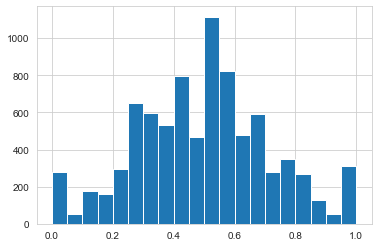

In [49]:
# Next step will be to remove outliers in the data. Need to trim things up a bit so that the fit transform doesn't kill us or overfit
#the model

import matplotlib.pyplot as plt

counts, edges, plot = plt.hist(train_df['away_pregame_win_percentage'], bins=20)

counts = counts.astype(int)

print(counts)

# as we can see, there is a concentration in the middle but we should be very wary of pregame stats on the extremes.
# Buckets up to .4 are very suspect for eFG - most teams end up shooting at least .45 over the course of the season
# The same goes for high (>.60) eFG allowed


In [50]:
from scipy.stats import skew, kurtosis
dataskew = skew(train_df['home_pregame_eFG_allowed'], bias=True)
datakurt = kurtosis(train_df['home_pregame_eFG_allowed'], bias=True)

print(dataskew, ' ', datakurt)

-0.6775860236881794   3.7366175344340125


In [ ]:
# Trimming extremes from train dataset only. This is because we want to see how an outlier strains the model
train_df = train_df[train_df['away_pregame_eFG'] < 0.6]
train_df = train_df[train_df['away_pregame_eFG'] > 0.4]
train_df = train_df[train_df['away_pregame_eFG_allowed'] < 0.6]
train_df = train_df[train_df['away_pregame_eFG_allowed'] > 0.4]
train_df = train_df[train_df['away_pregame_rebound_percentage'] < 0.65]
train_df = train_df[train_df['away_pregame_rebound_percentage'] > 0.4]

train_df = train_df[train_df['home_pregame_eFG'] < 0.6]
train_df = train_df[train_df['home_pregame_eFG'] > 0.4]
train_df = train_df[train_df['home_pregame_eFG_allowed'] < 0.6]
train_df = train_df[train_df['home_pregame_eFG_allowed'] > 0.4]
train_df = train_df[train_df['home_pregame_rebound_percentage'] < 0.65]
train_df = train_df[train_df['home_pregame_rebound_percentage'] > 0.4]
# away_pregame_eFG = under 0.4 and above 0.6 (not inclusive)
# away_pregame_eFG_allowed = same as eFG
# away_pregame_rebound_percentage = under 0.4 and above 0.65


#test_df = test_df[test_df['away_pregame_eFG'] < 0.6]
#test_df = test_df[test_df['away_pregame_eFG'] > 0.4]
#test_df = test_df[test_df['away_pregame_eFG_allowed'] < 0.6]
#test_df = test_df[test_df['away_pregame_eFG_allowed'] > 0.4]
#test_df = test_df[test_df['away_pregame_rebound_percentage'] < 0.65]
#test_df = test_df[test_df['away_pregame_rebound_percentage'] > 0.4]

#test_df = test_df[test_df['home_pregame_eFG'] < 0.6]
#test_df = test_df[test_df['home_pregame_eFG'] > 0.4]
#test_df = test_df[test_df['home_pregame_eFG_allowed'] < 0.6]
#test_df = test_df[test_df['home_pregame_eFG_allowed'] > 0.4]
#test_df = test_df[test_df['home_pregame_rebound_percentage'] < 0.65]
#train_df = train_df[train_df['home_pregame_rebound_percentage'] > 0.4]

In [ ]:
counts, edges, plot = plt.hist(train_df['away_pregame_eFG'], bins=20)

counts = counts.astype(int)

print(counts)


In [52]:
train_boxscores = train_df['boxscore']
test_boxscores = test_df['boxscore']

In [56]:
train_boxscores.to_csv('./train_boxscores.csv')
test_boxscores.to_csv('./test_boxscores.csv')

In [53]:
train_df.drop(columns=['boxscore'], inplace=True)
test_df.drop(columns=['boxscore'], inplace=True)

In [54]:
# shift column 'Name' to first position
first_column = test_df.pop('Home_Win')
  
# insert column using insert(position,column_name,
# first_column) function
test_df.insert(0, 'Home_Win', first_column)
test_df.head()

,Home_Win,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
0,0,0.419355,0.356164,0.429825,0.000000,0.530303,0.453333,0.535211,0.000000,0,0,0,0,1
1,1,0.465446,0.489320,0.559864,0.347826,0.556391,0.534106,0.463707,0.818182,0,1,0,0,0
2,0,0.551829,0.532934,0.490323,0.666667,0.535294,0.559585,0.494186,0.333333,0,0,0,0,1
3,1,0.497426,0.501880,0.462597,0.680000,0.491597,0.587889,0.441572,0.769231,0,1,0,0,0
4,0,0.534159,0.483721,0.513923,0.380952,0.570997,0.570648,0.500884,0.809524,0,0,1,0,0


In [55]:
# shift column 'Name' to first position
first_column = train_df.pop('Home_Win')
  
# insert column using insert(position,column_name,
# first_column) function
train_df.insert(0, 'Home_Win', first_column)
train_df.head()

,Home_Win,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
0,0,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0,0,0,0,1
1,0,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,1,0,0,0,0
2,1,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,0,1,0,0,0
3,1,0.546021,0.521249,0.466043,0.777778,0.536078,0.492695,0.538396,0.368421,0,0,1,0,0
4,0,0.537612,0.519357,0.467428,0.761905,0.542275,0.579537,0.451074,0.772727,0,1,0,0,0


In [57]:
train_df.to_csv('./train.csv')
test_df.to_csv('./test.csv')

In [48]:
# Create separate dataframes for the features and target variable so we can train the model
x_train = train_df.iloc[:,1:]
y_train = train_df['Home_Win'].values.reshape(-1,1)

#This will be used to test our performance
x_test = test_df.iloc[:,1:]
y_test = test_df['Home_Win'].values.reshape(-1,1)


In [49]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
features= ['away_pregame_eFG', 'away_pregame_rebound_percentage', 'away_pregame_eFG_allowed', 'away_pregame_win_percentage','home_pregame_eFG', 'home_pregame_rebound_percentage', 'home_pregame_eFG_allowed', 'home_pregame_win_percentage']

# Apply transformations to the features we need to normalize on a (-1, 1) scale. Makes the model faster
x_train[features]= ss.fit_transform(x_train[features])
x_test[features]= ss.fit_transform(x_test[features])

In [ ]:
# Undo the transform with the below if you want:
x_train[features] = ss.inverse_transform(x_train[features])
x_test[features] = ss.inverse_transform(x_test[features])

In [51]:
train_df.describe()

,Home_Win,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
count,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000,8402.000000
mean,0.635444,0.502657,0.503886,0.497448,0.494256,0.514425,0.516483,0.484767,0.595786,0.179600,0.260771,0.266484,0.113901,0.179243
std,0.481334,0.040010,0.038220,0.039924,0.221490,0.038098,0.037129,0.039022,0.215887,0.383877,0.439081,0.442147,0.317710,0.383579
min,0.000000,0.198529,0.272727,0.245763,0.000000,0.281818,0.264706,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.480298,0.481022,0.474431,0.333333,0.490700,0.493151,0.462973,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.503280,0.502786,0.497705,0.500000,0.513638,0.515076,0.486607,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.526975,0.526562,0.520669,0.636364,0.537620,0.539778,0.509146,0.750000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,0.771429,0.746269,0.798387,1.000000,0.777027,0.763889,0.686441,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
x_test.head()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
0,-0.148938,-0.818665,-0.061297,-0.569979,1.021150,-0.200461,0.698007,-0.058155,0,1,0,0,0
1,-0.416918,0.771043,1.271444,-0.548692,-0.551987,0.076031,-1.863591,0.661297,1,0,0,0,0
2,0.338639,0.384666,-0.047005,0.898119,-0.826244,0.477528,-0.354420,-0.402559,0,0,0,1,0
3,-0.781115,0.568604,0.338022,-0.249816,-1.093098,0.546751,-1.042601,0.707004,0,1,0,0,0
4,0.493329,-0.844752,0.360834,0.313449,-0.811184,-2.073586,0.754600,-1.052693,0,0,1,0,0


In [ ]:
x_train.head()

In [53]:
len(x_test)

1472

In [54]:
len(x_train)

8402

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# clf is our model object
clf.fit(x_train, y_train.ravel())

LogisticRegression()

In [56]:
print(clf.score(x_train, y_train))

0.6354439419185908


In [57]:
# Get predictions on the test data using our model
predictions = clf.predict(x_test)
win_probability = clf.predict_proba(x_test)

In [58]:
len(win_probability)

1472

In [60]:
# output predictions to a DF. This displays the result and the prediction
predictionsdf = pd.DataFrame({'Win_Home': test_df['Home_Win'], 'Prediction': predictions })
predictionsdf.head()


,Win_Home,Prediction
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1


In [61]:
len(predictionsdf)

1472

In [72]:
# Create dataframe based on forecasted probability of each game 
win_probability_df = pd.DataFrame(win_probability, columns=['Home_Loss', 'Home_Win'])
win_probability_df.isnull().sum()

Home_Loss    0
Home_Win     0
dtype: int64

In [71]:
del win_probability_df

<AxesSubplot:>

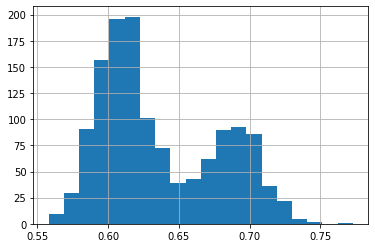

In [98]:
win_probability_df= win_probability_df.merge(predictionsdf, left_index=True, right_index=True, how='inner')
win_probability_df.head()
# Create histogram to show distribution
win_probability_df['Home_Win'].hist(bins=20)

In [74]:
len(win_probability_df)

1332

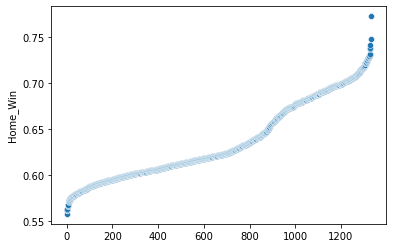

In [77]:
win_probability_df.sort_values('Home_Win', inplace=True)

plot = sns.scatterplot(data=win_probability_df, x=range(0,1332), y='Home_Win')

plt.show()

In [96]:
# Getting the accuracy for the games that we forecast extra high and low likelihood
topbucket = win_probability_df[win_probability_df['Home_Win'] > 0.72]

bottombucket = win_probability_df[win_probability_df['Home_Win'] < 0.6]
#bottombucket.head()
topbucket.head()


,Home_Loss,Home_Win,Win_Home,Prediction
246,0.279948,0.720052,0,1
914,0.279789,0.720211,1,1
1371,0.278327,0.721673,0,1
1258,0.277864,0.722136,0,1
899,0.277498,0.722502,1,1


In [79]:
bottombucket.isnull().sum()

Home_Loss     0
Home_Win      0
Win_Home      0
Prediction    0
dtype: int64

In [97]:
from sklearn.metrics import accuracy_score
# Get the accuracy score for our overall predictions, the top and bottom buckets
overallaccuracy = accuracy_score(predictionsdf['Win_Home'], predictionsdf['Prediction'])
topbucketaccuracy = accuracy_score(topbucket['Win_Home'], topbucket['Prediction'])
bottombucketaccuracy = accuracy_score(bottombucket['Win_Home'], bottombucket['Prediction'])
print('Overall Accuracy: ', overallaccuracy, '      Accuracy p>.70: ', topbucketaccuracy, '     Accuracy p<.60: ',  bottombucketaccuracy)

Overall Accuracy:  0.6480978260869565       Accuracy p>.70:  0.5925925925925926      Accuracy p<.60:  0.6507352941176471


In [81]:
# Getting confidence ratings for our predictions. >=1 is very confident
confidence = clf.decision_function(x_test)
confidencedf = pd.DataFrame(confidence, columns=['Confidence_Score'])

In [ ]:
confidencedf.head(30)

In [82]:
confidencedf.describe()

,Confidence_Score
count,1472.000000
mean,0.566621
std,0.185948
min,0.232559
25%,0.420280
50%,0.496826
75%,0.741354
max,1.225600


In [95]:
#  functions for accuracy based on high and low confidence projections
highconfidencedf = confidencedf[confidencedf['Confidence_Score'] >= 1]
lowconfidencedf = confidencedf[confidencedf['Confidence_Score'] <=.25]

highconfidencedf = highconfidencedf.merge(predictionsdf, left_index=True, right_index=True, how='inner')
lowconfidencedf = lowconfidencedf.merge(predictionsdf, left_index=True, right_index=True, how='inner')

#highconfidencedf.dropna(axis=0, how='any', inplace=True)


highconfidenceaccuracy = accuracy_score(highconfidencedf['Win_Home'], highconfidencedf['Prediction'])
lowconfidenceaccuracy = accuracy_score(lowconfidencedf['Win_Home'], lowconfidencedf['Prediction'])
print('high conf: ', highconfidenceaccuracy, '  low conf: ' , lowconfidenceaccuracy)

high conf:  0.8333333333333334   low conf:  0.6666666666666666


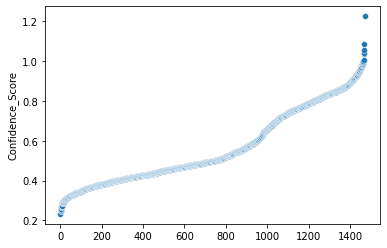

In [89]:
confidenceplot = confidencedf.sort_values('Confidence_Score')

plot = sns.scatterplot(data=confidenceplot, x=range(0,1472), y='Confidence_Score')

plt.show()

In [ ]:
len(highconfidencedf)

In [100]:
from yellowbrick.classifier import discrimination_threshold
from sklearn.linear_model import LogisticRegression
from yellowbrick.datasets import load_spam
#X, y = load_spam()
#visualizer = discrimination_threshold(LogisticRegression(multi_class="auto", solver="liblinear"), X,y)

ModuleNotFoundError: No module named 'yellowbrick'

In [102]:
import pickle

ncaab_winner_v1 = pickle.dumps(clf)
x_test.to_csv('./x_test_v1.csv')
test_df['Home_Win'].to_csv('./y_test_v1.csv')
x_train.to_csv('./x_train_v1.csv')
train_df['Home_Win'].to_csv('./y_train_v1.csv')
